In [2]:
import pandas as pd
import allel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../analysis_files/df_fig1.csv')

In [5]:
color_map = {'BioGraph*':'yellowgreen', 'breakdancer':'peru', 'clever':'gold', 'delly':'darkorange', 'delly':'mediumorchid', 
             'gasv':'firebrick', 'gridss':'cornflowerblue', 'indelminer':'forestgreen', 
             'mistrvar':'salmon', 'pindel':'darkorange', 'popdel':'navy', 'rdxplorer':'darkgray', 
             'smoove':'orangered',  'true deletions':'black'}

Tool
BioGraph*          201.0
BreakDancer        392.0
CLEVER             107.0
DELLY              473.0
GASV              1404.0
GRIDSS             334.5
LUMPY              430.0
MiStrVar           117.0
Pindel              64.0
PopDel             963.0
RDXplorer          799.0
indelMINER         198.0
true deletions     398.0
Name: length, dtype: float64
Index(['GASV', 'PopDel', 'RDXplorer', 'DELLY', 'LUMPY', 'true deletions',
       'BreakDancer', 'GRIDSS', 'BioGraph*', 'indelMINER', 'MiStrVar',
       'CLEVER', 'Pindel'],
      dtype='object', name='Tool')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

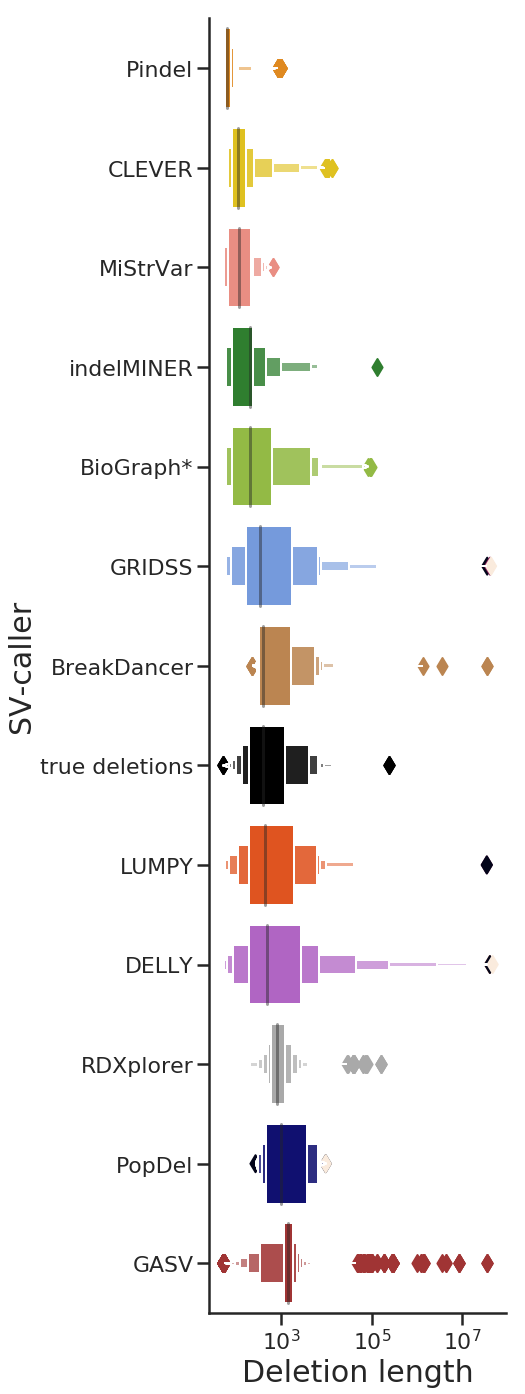

In [7]:

fig1g=sns.set_style("ticks")
fig1g=sns.set_context("poster",rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30})
labels=['Pindel','CLEVER','MiStrVar','indelMINER', 'BioGraph*','GRIDSS','BreakDancer','true deletions','LUMPY','DELLY','RDXplorer','PopDel','GASV']
fig_order=['pindel','clever','mistrvar','indelminer', 'BioGraph*', 'gridss','breakdancer','true deletions','smoove','delly','rdxplorer','popdel','gasv']

# labels    = ['true deletions','indelminer','sniffles','popdel','mistrvar','lumpy','BioGraph*','breakdancer','delly','gridss','clever','rdxplorer','pindel','gasv']
# fig_order =['true deletions','indelminer','sniffles','popdel','mistrvar','smoove','BioGraph*','breakdancer','delly','gridss','clever','rdxplorer','pindel','gasv']
df["Tool"] = df["tool"].map(dict(zip(fig_order, labels)))
test=df.groupby("Tool")["length"].median()
print(test)
ranks = df.groupby("Tool")["length"].median().fillna(0).sort_values()[::-1].index
print(ranks)
pal = []
for tool in fig_order:
    pal.append(color_map[tool])
fig1g = sns.catplot(x="length", y="Tool",kind='boxen',data=df.sort_values("length"),height=20, aspect=.4, palette=pal,order=labels)
#fig1g = sns.catplot(x="tool", y="length",kind='boxen',data=df, aspect=12, palette=pal, order=fig_order)
# fig1g.invert_yaxis()
fig1g.set(xscale="log");
fig1g.set(ylabel='SV-caller')
fig1g.set(xlabel='Deletion length')
# sns.set(rc={'figure.figsize':(1,1)})
fig1g=sns.despine()
plt.savefig("../figures/fig2/fig2.svg", bbox_inches='tight')
plt.savefig("../figures/fig2/fig2.eps", bbox_inches='tight')
plt.savefig("../figures/fig2/fig2", bbox_inches='tight')
plt.savefig("../figures/fig2/fig2.pdf", bbox_inches='tight')